In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Relative path to the dataset
file_path_Parkinson = "../../../challenge-02/data/raw/ALZHEIMER_Dataset/Dataset/parkinsons_disease_data.csv"
# Load the Dataset 
data_Parkinson = pd.read_csv(file_path_Parkinson)

print(data_Parkinson.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [2]:
# **Identificar colunas não numéricas**
print("Tipos de dados antes da conversão:")
print(data_Parkinson.dtypes)


for col in data_Parkinson.columns:
    data_Parkinson[col] = pd.to_numeric(data_Parkinson[col], errors='coerce')

print("\nTipos de dados após a conversão:")
print(data_Parkinson.dtypes)

Tipos de dados antes da conversão:
PatientID                     int64
Age                           int64
Gender                        int64
Ethnicity                     int64
EducationLevel                int64
BMI                         float64
Smoking                       int64
AlcoholConsumption          float64
PhysicalActivity            float64
DietQuality                 float64
SleepQuality                float64
FamilyHistoryParkinsons       int64
TraumaticBrainInjury          int64
Hypertension                  int64
Diabetes                      int64
Depression                    int64
Stroke                        int64
SystolicBP                    int64
DiastolicBP                   int64
CholesterolTotal            float64
CholesterolLDL              float64
CholesterolHDL              float64
CholesterolTriglycerides    float64
UPDRS                       float64
MoCA                        float64
FunctionalAssessment        float64
Tremor                       

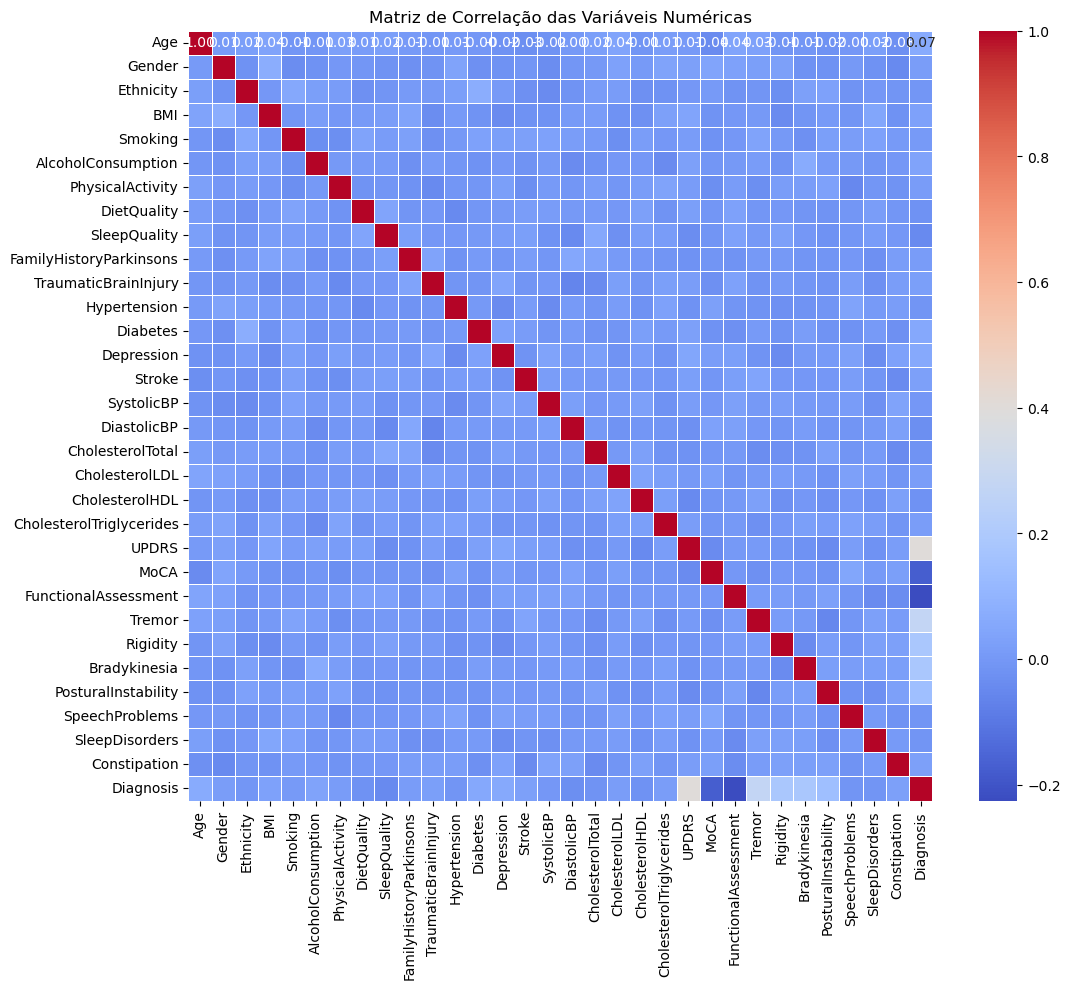

In [3]:
#Correlation Matrix

data_Parkinson = data_Parkinson.drop(columns=['DoctorInCharge', 'EducationLevel', "PatientID"])

correlation_matrix = data_Parkinson.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [4]:

print("\nNumber of missing values per column:")
print(data_Parkinson.isnull().sum())




Number of missing values per column:
Age                         0
Gender                      0
Ethnicity                   0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dt

In [5]:
X = data_Parkinson.drop(columns=['Diagnosis'])
y = data_Parkinson['Diagnosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Corrigir desbalanceamento

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [7]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [8]:
# Data Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_test)
print(f"Number of components after PCA: {X_pca.shape[1]}")

Number of components after PCA: 29


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


c:\Users\joaom\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5770 - loss: 1.8754 - val_accuracy: 0.9855 - val_loss: 1.2791
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 1.3314 - val_accuracy: 1.0000 - val_loss: 0.8109
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8241 - loss: 1.0157 - val_accuracy: 1.0000 - val_loss: 0.6151
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8396 - loss: 0.8275 - val_accuracy: 1.0000 - val_loss: 0.4907
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8487 - loss: 0.7026 - val_accuracy: 1.0000 - val_loss: 0.3901
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8540 - loss: 0.6281 - val_accuracy: 1.0000 - val_loss: 0.3297
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8715 - loss: 0.5346 - val_accuracy: 1.0000 - val_loss: 0.2924
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8847 - loss: 0.4679 - val_accuracy: 1.0000 - val_loss

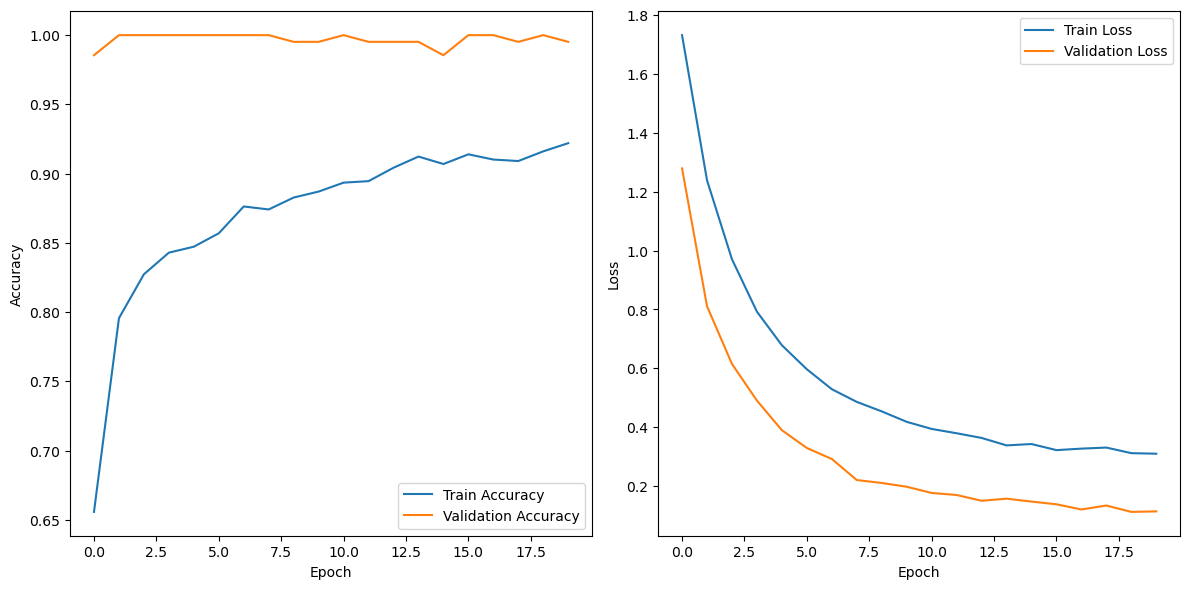

In [9]:
# Neural Network
%pip install tensorflow
%pip install scikeras

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt

# **Definir a função do modelo**
def create_model():
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],),
               kernel_regularizer=regularizers.l2(0.01)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(64, activation='relu',
               kernel_regularizer=regularizers.l2(0.01)))
  model.add(layers.Dropout(0.3)) 

  model.add(layers.Dense(32, activation='relu'))

  model.add(layers.Dense(1, activation='sigmoid'))

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

# **Early Stopping para evitar overfitting**
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# **Treinar o modelo no conjunto completo de treino**
model = create_model()
history = model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# **Avaliação no conjunto de teste**
accuracy = model.evaluate(X_test, y_test)[1]
print(f'\nAccuracy on the test set: {accuracy:.2f}')

# **Plotar accuracy e loss**
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier


x = data_Parkinson.drop(columns = ['Diagnosis'])
y = data_Parkinson['Diagnosis']

rf_accuracy = list()
rf_cv_score = list()
rf_imp = list()

## Running 5 times CV
for i in range(5):
    print('loop: ', i+1)
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(x, y):
        
        ## Splitting the data 
        x_train, x_test = x.iloc[train_ix], x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
        ## Building RF model ##
        rf_md = RandomForestClassifier(n_estimators = 1000, max_depth = 5).fit(x_train, y_train)
        # extracting feature importances
        rf_imp.append(rf_md.feature_importances_)
        ## Predicting on test
        rf_pred = rf_md.predict(x_test)
        
        ## Computing metrics
        rf_accuracy.append(accuracy_score(y_test, rf_pred))

rf_cv_score = np.mean(rf_accuracy)

print('The accuracy score of the rf model over 5-folds (run 5 times) is:', rf_cv_score)

loop:  1
loop:  2
loop:  3
loop:  4
loop:  5
The accuracy score of the rf model over 5-folds (run 5 times) is: 0.8651781472684087


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.5344418052256532
Precision: 0.5581364631110558
Recall: 0.5344418052256532
F1 Score: 0.5410811537906327
Confusion Matrix:
 [[ 83  77]
 [119 142]]
